In [2]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [57]:
delta = lambda f: [abs(f[0] - f[i]) for i in range(1, len(f))]
x = ["Basis", "Dual-Core", "SIMD", "Dual+SIMD"]
time = [23.7, 12.05, 13.9, 7.17]
time_delta = delta(time)
slice_lut = [17982, 20082, 19289, 22740]
slice_lut_delta = delta(slice_lut)
slice_reg = [10450, 11904, 11538, 14107]
slice_reg_delta = delta(slice_reg)

In [58]:
per = lambda a, b: [a[i]/b[i] for i in range(0, len(a))]
ld_per_td = per(slice_lut_delta, time_delta)
reg_per_td = per(slice_reg_delta, time_delta)
ldreg_per_td = per([sum(x) for x in zip(slice_lut_delta,slice_reg_delta)], time_delta)


[124.80686695278972, 111.02040816326532, 221.23411978221415]

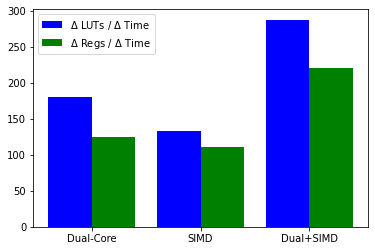

In [116]:
x = ["Dual-Core", "SIMD", "Dual+SIMD"]
ratio = lambda f: [f[i]/f[0] for i in range(1, len(f))]
luts_ratio = per(slice_lut_delta, time_delta)
time_ratio = per(slice_reg_delta, time_delta)
bar_width = 0.4
x_pos = [i for i, _ in enumerate(x)]
x_off_pos = [val + bar_width for val in x_pos]

tick_pos = [val + bar_width / 2 for val in x_pos]
plt.xticks(tick_pos, x)

plt.bar(x_pos, luts_ratio, width=bar_width, color='b', label="$\Delta$ LUTs / $\Delta$ Time")
plt.bar(x_off_pos, time_ratio, width=bar_width, color='g', label="$\Delta$ Regs / $\Delta$ Time")
plt.legend()
plt.savefig("luts_time_plot.pdf")
time_ratio

<BarContainer object of 4 artists>

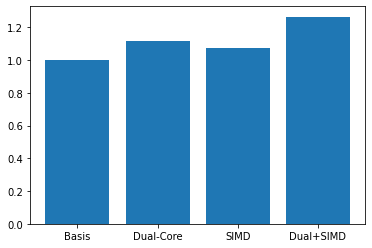

In [85]:
plt.bar(x, luts_ratio)

<BarContainer object of 4 artists>

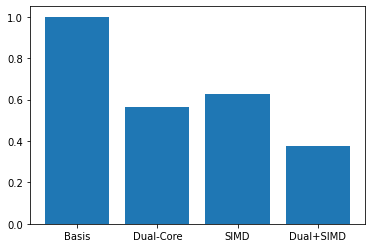

In [89]:
time_luts_ratio = [luts_ratio[i] * time_ratio[i] for i in range(0, 4)]

plt.bar(x, time_luts_ratio)

<BarContainer object of 3 artists>

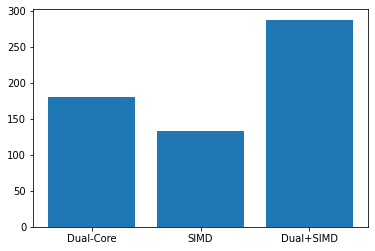

In [59]:
x = ["Dual-Core", "SIMD", "Dual+SIMD"]
plt.bar(x, ld_per_td)

<BarContainer object of 3 artists>

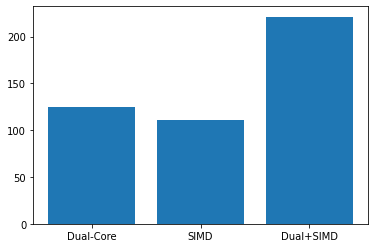

In [60]:
x = ["Dual-Core", "SIMD", "Dual+SIMD"]
plt.bar(x, reg_per_td)

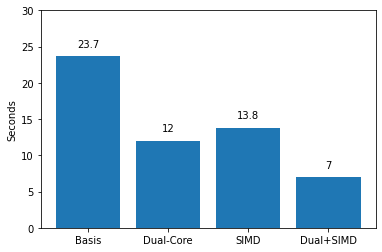

In [117]:
x = ["Basis", "Dual-Core", "SIMD", "Dual+SIMD"]
time = [23.7, 12, 13.8, 7]

plt.bar(x, time)
plt.ylabel("Seconds")
ax = plt.gca()
plt.ylim(0, 30)
rects = ax.patches
for rect, label in zip(rects, time):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom')
plt.savefig("time.pdf")

<BarContainer object of 3 artists>

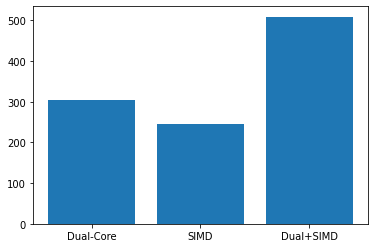

In [62]:
x = ["Dual-Core", "SIMD", "Dual+SIMD"]
plt.bar(x, ldreg_per_td)

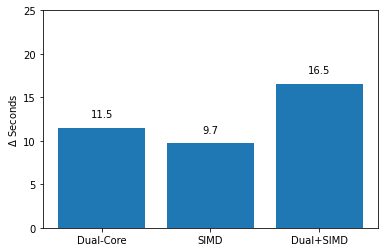

In [23]:
x = ["Dual-Core", "SIMD", "Dual+SIMD"]

plt.bar(x, time_delta)
plt.ylabel("$\Delta$ Seconds")
ax = plt.gca()
plt.ylim(0, 25)
rects = ax.patches
for rect, label in zip(rects, time_delta):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom')